In [ ]:
!pip install -q -U bitsandbytes

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install -q -U git+https://github.com/huggingface/accelerate.git

In [ ]:
pip install accelerate

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install faiss-gpu

In [ ]:
import faiss

In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.7 MB/s eta 0:00:00


In [ ]:
import os
import sys
import random
import accelerate
from typing import List

from tqdm.auto import tqdm, trange
from nltk import sent_tokenize
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import torch
from datasets import load_dataset
import transformers
from transformers import AutoModel, AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
# import faiss

In [ ]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

In [ ]:
model_id = "TheBloke/Llama-2-7B-Chat-fp16"

llm_model = AutoModelForCausalLM.from_pretrained(model_id, quantization_config=bnb_config, device_map={"":0})
llm_tokenizer = AutoTokenizer.from_pretrained(model_id, padding_side='left', add_eos_token=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:415: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuratio

In [ ]:
# Рабочая директория
os.chdir('D:/sokrat_bot_generative')

In [ ]:
df = 'data_new.csv', sep = ',')
dfnew = df.dropna(axis = 0)
dfnew

,Unnamed: 0,Query,Answer,Label
0,0,"Ты удивляешься, думаю, сын Клиниаса, что,полюб...","Но, может быть, тебе неизвестно, Сократ, что т...",1
1,1,"Так видно ты будешь слушать меня со вниманием,...","Без сомнения, буду слушать, — только говори.",1
2,2,"Смотри же; ведь нет ничего удивительного, что ...","Говори, добряк; а я уж буду слушать.",1
3,3,"Приходится говорить. Хотя тому, кто любит, и н...","Я нахожу, Сократ, что начав говорить, ты сдела...",1
4,4,"Ты так спрашиваешь, как будто я должен произне...",Лишь бы тут не требовалось какой-нибудь трудно...,1
...,...,...,...,...
2931,1463,"Следовательно святость, по твоим словам, есть ...","Такое, Сократ, какое прилично слугам в отношен...",0
2932,1464,"Следовательно святость, Эвтифрон, есть какое-т...","Впрочем, Сократ, что̀ спрашиваешь ты о знании,...",0
2933,1465,"Мне-то неприятно, если это неверно. Скажи,каку...","Хочешь ли, я скажу тебе, Сократ, как определит...",0
2934,1466,"А иначе, что значили бы наши дары богам, Эвтиф...","Далеко не маловажна, потому что чрезвычайно ра...",0


In [ ]:
!pip install trl==0.4.7

In [ ]:
! pip install trl

In [ ]:
from trl import SFTTrainer
from peft import prepare_model_for_kbit_training, LoraConfig, get_peft_model, PeftModel
from transformers import TrainingArguments, pipeline
from datasets import Dataset

In [ ]:
# QLoRA parameters

# LoRA attention dimension
lora_r = 64

# Alpha parameter for LoRA scaling
lora_alpha = 16

# Dropout probability for LoRA layers
lora_dropout = 0.1

In [ ]:
# bitsandbytes parameters

# Activate 4-bit precision base model loading
use_4bit = True

# Compute dtype for 4-bit base models
bnb_4bit_compute_dtype = "float16"

# Quantization type (fp4 or nf4)
bnb_4bit_quant_type = "nf4"

# Activate nested quantization for 4-bit base models (double quantization)
use_nested_quant = False

In [ ]:
# TrainingArguments parameters

# Output directory where the model predictions and checkpoints will be stored
output_dir = 'D:/sokrat_bot_generative'

# Number of training epochs
num_train_epochs = 2

# Enable fp16/bf16 training (set bf16 to True with an A100)
fp16 = False
bf16 = False

# Batch size per GPU for training
per_device_train_batch_size = 4

# Batch size per GPU for evaluation
per_device_eval_batch_size = 4

# Number of update steps to accumulate the gradients for
gradient_accumulation_steps = 1

# Enable gradient checkpointing
gradient_checkpointing = True

# Maximum gradient normal (gradient clipping)
max_grad_norm = 0.3

# Initial learning rate (AdamW optimizer)
learning_rate = 2e-4

# Weight decay to apply to all layers except bias/LayerNorm weights
weight_decay = 0.001

# Optimizer to use
optim = "paged_adamw_32bit"

# Learning rate schedule (constant a bit better than cosine)
lr_scheduler_type = "constant"

# Number of training steps (overrides num_train_epochs)
max_steps = 500  # -1 for  full  dataset

# Ratio of steps for a linear warmup (from 0 to learning rate)
warmup_ratio = 0.03

# Group sequences into batches with same length
# Saves memory and speeds up training considerably
group_by_length = True

# Save checkpoint every X updates steps
save_steps = 100

# Log every X updates steps
logging_steps = 10

In [ ]:
# SFT parameters

# Maximum sequence length to use
max_seq_length = None

# Pack multiple short examples in the same input sequence to increase efficiency
packing = False

# Load the entire model on the GPU 0
device_map = {"": 0}

In [ ]:
compute_dtype = getattr(torch, bnb_4bit_compute_dtype)

bnb_config = BitsAndBytesConfig(
    load_in_4bit=use_4bit,
    bnb_4bit_quant_type=bnb_4bit_quant_type,
    bnb_4bit_compute_dtype=compute_dtype,
    bnb_4bit_use_double_quant=use_nested_quant,
)

In [ ]:
model_id = "TheBloke/Llama-2-7B-Chat-fp16"

llm_model = AutoModelForCausalLM.from_pretrained(model_id, quantization_config=bnb_config, device_map=device_map)
llm_model.config.use_cache = False
llm_model.config.pretraining_tp = 1

llm_tokenizer = AutoTokenizer.from_pretrained(model_id, add_eos_token=True, trust_remote_code=True, use_fast=False)
llm_tokenizer.add_special_tokens({'pad_token': '[PAD]'})
llm_tokenizer.pad_token = llm_tokenizer.eos_token
llm_tokenizer.padding_side = "right" # Fix weird overflow issue with fp16 training

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:415: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuratio

In [ ]:
peft_config = LoraConfig(
    lora_alpha=lora_alpha,
    lora_dropout=lora_dropout,
    r=lora_r,
    bias="none",
    task_type="CAUSAL_LM",
)

In [ ]:
training_arguments = TrainingArguments(
    output_dir=output_dir,
    num_train_epochs=num_train_epochs,
    per_device_train_batch_size=per_device_train_batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    optim=optim,
    save_steps=save_steps,
    logging_steps=logging_steps,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    fp16=fp16,
    bf16=bf16,
    max_grad_norm=max_grad_norm,
    max_steps=max_steps,
    warmup_ratio=warmup_ratio,
    group_by_length=group_by_length,
    lr_scheduler_type=lr_scheduler_type,
    report_to="tensorboard"
)

In [ ]:
dfnew = dfnew[dfnew['Label']==1]
query = dfnew['Query']
answer = dfnew['Answer']

In [ ]:
df = pd.DataFrame({
    'Query': query,
    'Answer': answer})

In [ ]:
df

,Query,Answer
0,"Ты удивляешься, думаю, сын Клиниаса, что,полюб...","Но, может быть, тебе неизвестно, Сократ, что т..."
1,"Так видно ты будешь слушать меня со вниманием,...","Без сомнения, буду слушать, — только говори."
2,"Смотри же; ведь нет ничего удивительного, что ...","Говори, добряк; а я уж буду слушать."
3,"Приходится говорить. Хотя тому, кто любит, и н...","Я нахожу, Сократ, что начав говорить, ты сдела..."
4,"Ты так спрашиваешь, как будто я должен произне...",Лишь бы тут не требовалось какой-нибудь трудно...
...,...,...
1463,"Следовательно святость, по твоим словам, есть ...","Ты весьма хорошо понял меня, Сократ."
1464,"Следовательно святость, Эвтифрон, есть какое-т...","Пожалуй, если тебе приятно так назвать ее."
1465,"Мне-то неприятно, если это неверно. Скажи,каку...","Разве ты думаешь, Сократ, что боги пользуются ..."
1466,"А иначе, что значили бы наши дары богам, Эвтиф...","Что другое представишь, кроме чествования, пок..."


In [ ]:
def generate_prompt(data_point):
    # Samples with additional context into.
    text = 'Ниже дан вопрос, дай на него краткий ответ на русском языке\n\n'
    text += f'### Вопрос:\n{data_point["Query"]}\n\n'
    text += f'### Ответ:\n{data_point["Answer"]}'
    return text

# add the "prompt" column in the dataset
df["prompt"] = df.apply(generate_prompt, axis=1)

In [ ]:
df["prompt"] = df.apply(generate_prompt, axis=1)

In [ ]:
df

,Query,Answer,prompt
0,"Ты удивляешься, думаю, сын Клиниаса, что,полюб...","Но, может быть, тебе неизвестно, Сократ, что т...","Ниже дан вопрос, дай на него краткий ответ на ..."
1,"Так видно ты будешь слушать меня со вниманием,...","Без сомнения, буду слушать, — только говори.","Ниже дан вопрос, дай на него краткий ответ на ..."
2,"Смотри же; ведь нет ничего удивительного, что ...","Говори, добряк; а я уж буду слушать.","Ниже дан вопрос, дай на него краткий ответ на ..."
3,"Приходится говорить. Хотя тому, кто любит, и н...","Я нахожу, Сократ, что начав говорить, ты сдела...","Ниже дан вопрос, дай на него краткий ответ на ..."
4,"Ты так спрашиваешь, как будто я должен произне...",Лишь бы тут не требовалось какой-нибудь трудно...,"Ниже дан вопрос, дай на него краткий ответ на ..."
...,...,...,...
1463,"Следовательно святость, по твоим словам, есть ...","Ты весьма хорошо понял меня, Сократ.","Ниже дан вопрос, дай на него краткий ответ на ..."
1464,"Следовательно святость, Эвтифрон, есть какое-т...","Пожалуй, если тебе приятно так назвать ее.","Ниже дан вопрос, дай на него краткий ответ на ..."
1465,"Мне-то неприятно, если это неверно. Скажи,каку...","Разве ты думаешь, Сократ, что боги пользуются ...","Ниже дан вопрос, дай на него краткий ответ на ..."
1466,"А иначе, что значили бы наши дары богам, Эвтиф...","Что другое представишь, кроме чествования, пок...","Ниже дан вопрос, дай на него краткий ответ на ..."


In [ ]:
dataset = Dataset.from_pandas(df)

In [ ]:
dataset = dataset.map(lambda samples: llm_tokenizer(samples["prompt"]), batched=True)

Map:   0%|          | 0/1463 [00:00<?, ? examples/s]

In [ ]:
#from peft import PeftConfig

In [ ]:
data = dataset.train_test_split(test_size=0.1)
train_data = data["train"]
test_data = data["test"]

In [ ]:
trainer = SFTTrainer(
    model=llm_model,
    train_dataset=train_data,
    eval_dataset=test_data,
    dataset_text_field="prompt",
    peft_config = peft_config,
    max_seq_length=max_seq_length,
    tokenizer=llm_tokenizer,
    args=training_arguments,
    packing=packing,
)

/usr/local/lib/python3.10/dist-packages/peft/utils/other.py:102: FutureWarning: prepare_model_for_int8_training is deprecated and will be removed in a future version. Use prepare_model_for_kbit_training instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:159: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(


Map:   0%|          | 0/1316 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
llm_model.config.use_cache = False  # silence the warnings. Please re-enable for inference!
trainer.train()
trainer.model.save_pretrained('./llama_2_trained')

Step,Training Loss
10,2.862300
20,2.406600
30,2.069200
40,1.702900
50,1.371300
60,2.269800
70,1.906400
80,1.682900
90,1.532500
100,1.201700


Не забывайте включать кеширование в модели, на этапе inference

In [ ]:
train_list = [2.862300,2.406600,2.069200,1.702900,1.371300,2.269800,1.906400,1.682900,1.532500,1.201700,2.189700,1.879800,1.765600,1.466200,1.214700,2.231500,1.942500,1.743900,1.562400,1.222700,2.169500,1.920500,1.690600,1.479400,1.314400,2.067800,1.890300,1.726100,1.426200,1.153300,1.995900,1.567400,1.427200,1.990400,1.629300,1.522800,1.317600,1.171200,1.988300,1.674200,1.469000,1.294300,1.169000,1.956700,1.762000,1.601600,1.338400,1.282500,2.036700,1.729400]
train_list_compact = []
for i in range(0, 50, 10):
  x = train_list[i: i+10]
  print(x)
  y = sum(x)/len(x)
  train_list_compact.append(y)

[2.8623, 2.4066, 2.0692, 1.7029, 1.3713, 2.2698, 1.9064, 1.6829, 1.5325, 1.2017]
[2.1897, 1.8798, 1.7656, 1.4662, 1.2147, 2.2315, 1.9425, 1.7439, 1.5624, 1.2227]
[2.1695, 1.9205, 1.6906, 1.4794, 1.3144, 2.0678, 1.8903, 1.7261, 1.4262, 1.1533]
[1.9959, 1.5674, 1.4272, 1.9904, 1.6293, 1.5228, 1.3176, 1.1712, 1.9883, 1.6742]
[1.469, 1.2943, 1.169, 1.9567, 1.762, 1.6016, 1.3384, 1.2825, 2.0367, 1.7294]


In [ ]:
import matplotlib.pyplot as plt

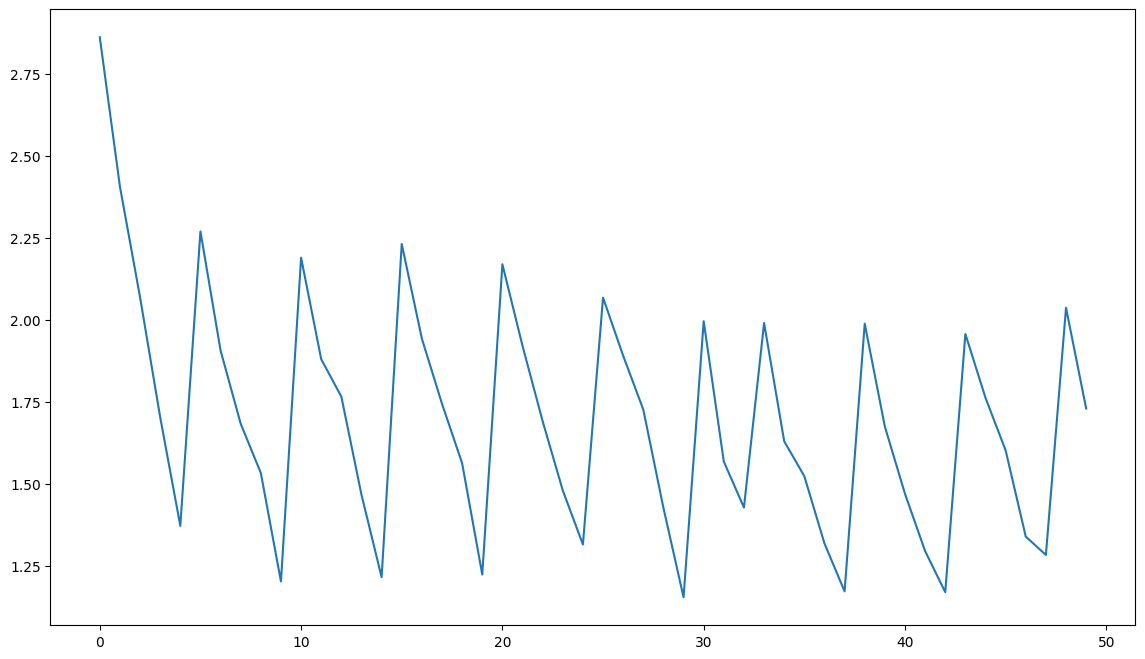

In [ ]:
# РИС. 1: флуктуация Training Loss на промежутке 0 - 500 шагов.
window_size = 32

fix, ax = plt.subplots(figsize=(14, 8))
ax.plot(range(len(train_list)), train_list);


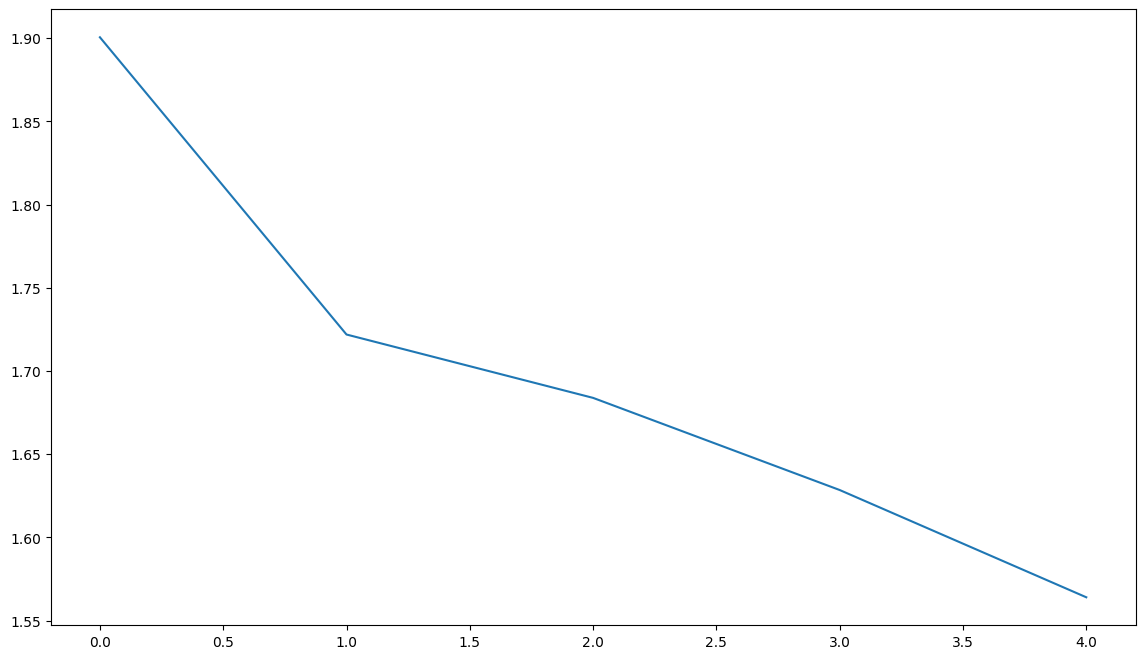

In [ ]:
# РИС. 2: снижение во времени усредленных (по сотням точек) значений Training Loss на промежутке.1
fix, ax = plt.subplotsция(figsize=(14, 8))
ax.plot(range(len(train_list_compact)), train_list_compact);


In [ ]:
def get_completion(query, model, tokenizer):
    prompt = 'Ниже дан вопрос, дай на него краткий ответ на русском языке\n\n'
    prompt += f'### Вопрос:\n{query}\n'
    prompt += f'### Ответ:\n'
    encodeds = tokenizer(prompt, return_tensors="pt", add_special_tokens=True)
    model_inputs = encodeds.to(model.device)
    with torch.no_grad():
        generated_ids = model.generate(**model_inputs, max_new_tokens=70, do_sample=True, pad_token_id=tokenizer.eos_token_id)
    decoded = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
    answer = ''
    answer_ind = 0
    answer_2ind = 0
    answer_2 = ''
    answer_3 = ''
    lst = []
    for i in decoded[0]:
      lst.append(i.strip('/n'))
    answer = ''.join(lst)
    if ('### Ответ:') in answer:
      answer_ind = answer.find('### Ответ:')
      answer_2 = answer[answer_ind+11:]
      if '### Вопрос:' in answer_2:
        answer_2ind = answer_2.find('### Вопрос:')
        if '.' in answer_2:
          end = answer_2.find('/n')
        elif '?' in answer_2:
          end = answer_2.find('?')
        elif '!' in answer_2:
          end = answer_2.find('!')
        else:
          end = len(answer_2)-1
        answer_3 = answer_2[answer_2ind+7:end+1]
      else:
        answer_3 = answer_2
    else:
      answer_3 = answer
    return answer_3


In [ ]:
def get_completion_2(query, model, tokenizer):
    prompt = 'Ниже дан вопрос, дай на него краткий ответ на русском языке\n\n'
    prompt += f'### Вопрос:\n{query}\n\n'
    prompt += f'### Ответ:\n'
    encodeds = tokenizer(prompt, return_tensors="pt", add_special_tokens=True)
    model_inputs = encodeds.to(model.device)
    with torch.no_grad():
        generated_ids = model.generate(**model_inputs, max_new_tokens=70, do_sample=True, pad_token_id=tokenizer.eos_token_id)
    decoded = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
    return decoded[0]


In [ ]:
llm_model.config.use_cache = True

In [ ]:
result = get_completion(query="Приветствую тебя, о великий философ!", model=llm_model, tokenizer=llm_tokenizer)

print(result)

A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


ократ:
Выражаешь ты, кажется, нечто, не о чём не очень ясно, Сократ


In [ ]:
result = get_completion(query="Что такое справедливость?", model=llm_model, tokenizer=llm_tokenizer)

print(result)

A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(



Ты говоришь, Сократ, как будто справедливость не есть иное, как справедливость и несправедливость.


In [ ]:
result = get_completion(query="Что лучше - быть справедливым и добродетельным или прожить всю жизнь в наслаждениях?", model=llm_model, tokenizer=llm_tokenizer)
print(result)

A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.



Это невозможно, Сократ, чтобы я сказал это. Я не могу сказать, что справедливость и добродетель не столь ценны, как наслаждения. Ведь, по моему мнению, они ценны в не мень


In [ ]:
result = get_completion_2(query="Единое множественно или нет, как ты считаешь?", model=llm_model, tokenizer=llm_tokenizer)
print(result)

A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Ниже дан вопрос, дай на него краткий ответ на русском языке

### Вопрос:
Единое множественно или нет, как ты считаешь?

### Ответ:

### Вопрос:
Но это, кажется, не так. Или не то, что мы говорим, или не то, что̀ говорит наш прекрасный друг. Но ты, по крайней мере, скажешь, что это не так, или не понима


In [ ]:
def final_result(query):
  answer_final = get_completion(query, model=llm_model, tokenizer=llm_tokenizer)
  return answer_final

In [ ]:
!pip install gradio
import gradio as gr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 10.8 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size

In [ ]:
def greet(name, intensity):
    return "Hello, " + name + "!" * int(intensity)

demo = gr.Interface(
    fn=final_result,
    inputs=["text"],
    outputs=["text"],
)

demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://97c499c7d94f9c8215.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
torch.cuda.empty_cache()

In [ ]:
base_model = AutoModelForCausalLM.from_pretrained(
    model_id,
    low_cpu_mem_usage=True,
    return_dict=True,
    torch_dtype=torch.float16,
    device_map=device_map,
)
model = PeftModel.from_pretrained(base_model, './llama_2_trained')
model = model.merge_and_unload()

# Reload tokenizer to save it
tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"